# Imports

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Config
sns.set_theme(style="darkgrid")
sns.set()

# Open file

In [2]:
df = pd.read_csv("../data/clear_data.csv")

In [3]:
df.head()

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,published_at,remote_interview,remote,num_technology,contract_type,salary_min,salary_max,currency,technology,levels
0,Devops Engineer,Lublin,PL,devops,remote,ARcreate,10,mid,51.242630,22.556270,2021-03-23T12:15:00.000Z,True,True,3,permanent,6000.0,10000.0,pln,"['Java', 'Scala', 'Python']","[3, 3, 3]"
1,Junior Frontend Engineer,Lublin,PL,javascript,remote,ARcreate,10,junior,51.242630,22.556270,2021-03-23T12:15:00.000Z,True,True,3,permanent,3000.0,5000.0,pln,"['CSS', 'HTML', 'JavaScript']","[2, 2, 2]"
2,Senior Backend Engineer,Lublin,PL,python,remote,ARcreate,10,senior,51.242630,22.556270,2021-03-23T12:15:00.000Z,True,True,3,permanent,8000.0,12000.0,pln,"['Django', 'REST', 'Python']","[4, 4, 4]"
3,Fullstack Dev. - Swedish dating startup,Warszawa,PL,javascript,remote,Relate,2-10,mid,52.228181,21.012568,2021-03-23T12:05:00.000Z,False,True,3,b2b,9000.0,15000.0,pln,"['Node.js', 'JavaScript', 'React Native']","[4, 4, 4]"
4,Senior Storage Engineer,Kraków,PL,other,partly_remote,ECS Resource Group,"10,000+",mid,50.066114,19.940604,2021-03-23T12:04:00.000Z,True,False,3,b2b,18000.0,21000.0,pln,"['EMC', 'NAS', 'SAN']","[4, 4, 4]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3872 non-null   object 
 1   city              3872 non-null   object 
 2   country_code      3872 non-null   object 
 3   marker_icon       3872 non-null   object 
 4   workplace_type    3872 non-null   object 
 5   company_name      3872 non-null   object 
 6   company_size      3872 non-null   object 
 7   experience_level  3872 non-null   object 
 8   latitude          3872 non-null   float64
 9   longitude         3872 non-null   float64
 10  published_at      3872 non-null   object 
 11  remote_interview  3872 non-null   bool   
 12  remote            3872 non-null   bool   
 13  num_technology    3872 non-null   int64  
 14  contract_type     3872 non-null   object 
 15  salary_min        2990 non-null   float64
 16  salary_max        2990 non-null   float64


# Salary Target

In [5]:
df['salary_min'].isna().sum()
df = df.dropna()

# City

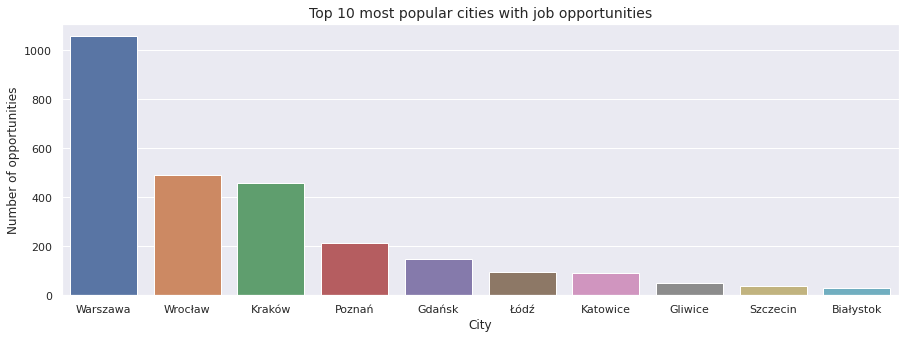

In [6]:
# Get first ten cities from column 'city'
city = df['city'].value_counts()[:10]

# Plotting a bar graph
plt.figure(figsize=(15,5))
sns.barplot(x=city.index, y=city.values)

# Simple config
plt.title("Top 10 most popular cities with job opportunities", fontsize=14)
plt.ylabel("Number of opportunities")
plt.xlabel("City")
plt.show()

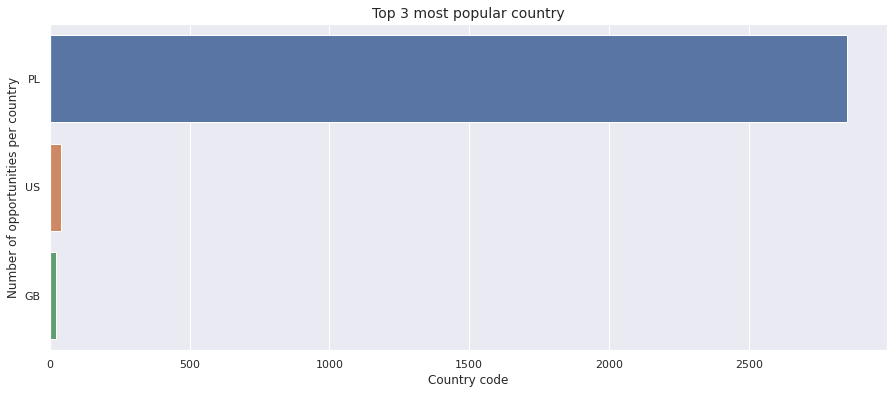

In [7]:
countries = df['country_code'].value_counts()[:3]


# Plotting a bar graph
plt.figure(figsize=(15,6))
sns.barplot(y=countries.index, x=countries.values, orient="h")

# Simple config
plt.title("Top 3 most popular country", fontsize=14)
plt.ylabel("Number of opportunities per country")
plt.xlabel("Country code")
plt.show()

In [8]:
df = df.loc[df['country_code'] == "PL"]

# Technologies

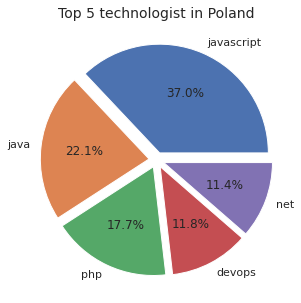

In [9]:
technologies = df['marker_icon'].value_counts()[:5]

plt.figure(figsize=(10,5))
plt.pie(x=technologies.values, labels=technologies.index, explode=[0.07]*5, autopct="%.1f%%")
plt.title("Top 5 technologist in Poland", fontsize=14)
plt.show()

In [10]:
df.head(1)

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,published_at,remote_interview,remote,num_technology,contract_type,salary_min,salary_max,currency,technology,levels
0,Devops Engineer,Lublin,PL,devops,remote,ARcreate,10,mid,51.24263,22.55627,2021-03-23T12:15:00.000Z,True,True,3,permanent,6000.0,10000.0,pln,"['Java', 'Scala', 'Python']","[3, 3, 3]"


In [11]:
skills = []
import ast

def get_skill(x):
    x = ast.literal_eval(x)
    for num_skills in range(len(x)):
        try:
            skills.append(x[num_skills])
        except:
            continue
    return skills

df['technology'].apply(lambda x: get_skill(x))

0       [Java, Scala, Python, CSS, HTML, JavaScript, D...
1       [Java, Scala, Python, CSS, HTML, JavaScript, D...
2       [Java, Scala, Python, CSS, HTML, JavaScript, D...
3       [Java, Scala, Python, CSS, HTML, JavaScript, D...
4       [Java, Scala, Python, CSS, HTML, JavaScript, D...
                              ...                        
3866    [Java, Scala, Python, CSS, HTML, JavaScript, D...
3867    [Java, Scala, Python, CSS, HTML, JavaScript, D...
3868    [Java, Scala, Python, CSS, HTML, JavaScript, D...
3869    [Java, Scala, Python, CSS, HTML, JavaScript, D...
3870    [Java, Scala, Python, CSS, HTML, JavaScript, D...
Name: technology, Length: 2850, dtype: object

In [12]:
unique_skills = set(skills)
print(len(unique_skills))

1087


In [13]:
df['total_skills'] = df['levels'].apply(lambda x: len(ast.literal_eval(x)))

# Workplace vs. COVID-19

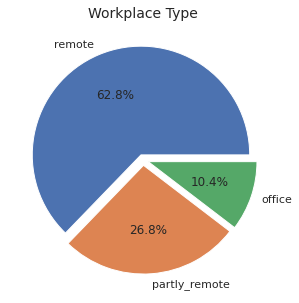

In [14]:
df_workplace = df['workplace_type'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(x=df_workplace.values, labels=df_workplace.index, explode=[0.05]*3, autopct="%.1f%%")
plt.title("Workplace Type", fontsize=14)
plt.show()

# Company size

In [15]:
df['company_size']

0            10
1            10
2            10
3          2-10
4       10,000+
         ...   
3866      20-30
3867      10-15
3868        10+
3869       5-10
3870         10
Name: company_size, Length: 2850, dtype: object

In [16]:
def clear_data(x):
    x = x.split('-')[0]
    x = re.sub('[-+<>,.]', '', x)
    x = x.replace(' ', '')
    if x == '':
        x = x.replace('', '0')
    x = int(x)
    return x

In [17]:
df['company_size'] = df['company_size'].apply(lambda x: clear_data(x))

In [18]:
df['company_size_bin'] = pd.cut(df['company_size'],
                                bins=[0,30,500,1000,100000],
                                labels=["very_small", "small","medium", 'large'])

# Experience Level

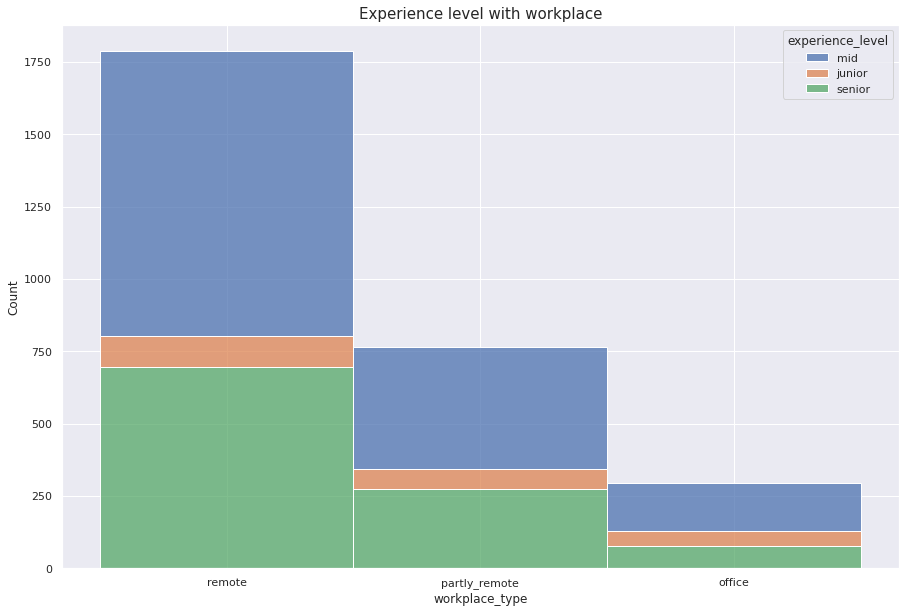

In [19]:
plt.figure(figsize=(15,10))

sns.histplot(
    df,
    x="workplace_type", hue="experience_level",
    multiple="stack",
);

plt.title("Experience level with workplace", fontsize=15.0);

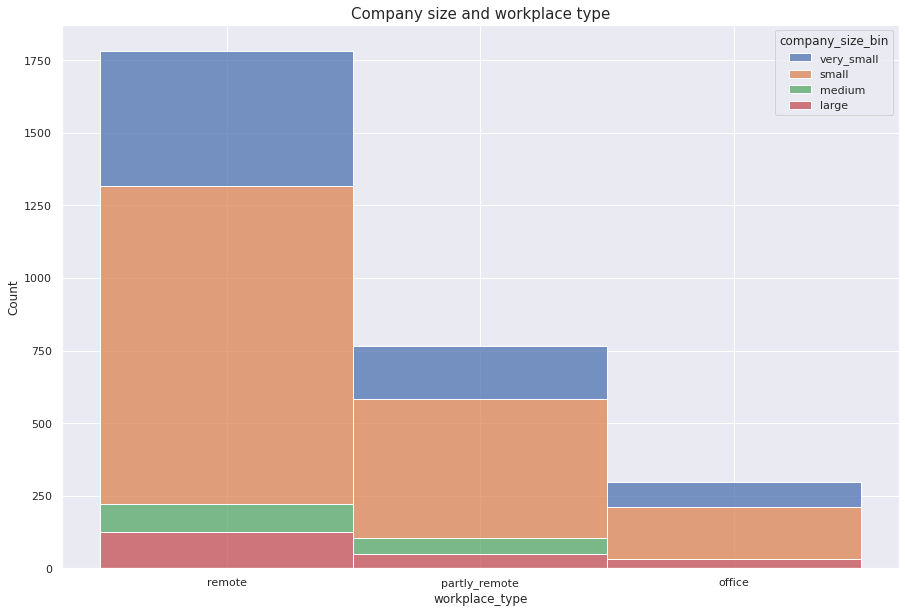

In [20]:
plt.figure(figsize=(15,10))

sns.histplot(
    df,
    x="workplace_type", hue="company_size_bin",
    multiple="stack",
);

plt.title("Company size and workplace type", fontsize=15.0);

# Salary

In [21]:
df['salary_mean'] = df[['salary_min', 'salary_max']].mean(axis=1)

### Convert to EUR, USD to PLN

In [22]:
df['currency'].value_counts()

pln    2819
eur      16
usd      13
gbp       2
Name: currency, dtype: int64

In [23]:
currency = {"usd": 3.70,
            "eur": 4.50,
            "gbp": 5.21,
            "chf": 4.12,
            "pln" : 1.0
           }

In [24]:
df = df.replace({"currency": currency})

In [25]:
df['salary_mean'] = df['salary_mean'] * df['currency']

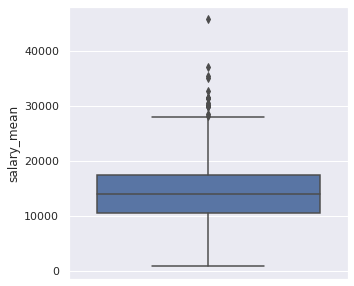

In [26]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df['salary_mean']);

In [27]:
df['salary_mean'].describe()

count     2850.000000
mean     14178.021565
std       5107.806076
min        875.000000
25%      10500.000000
50%      14000.000000
75%      17500.000000
max      45702.000000
Name: salary_mean, dtype: float64

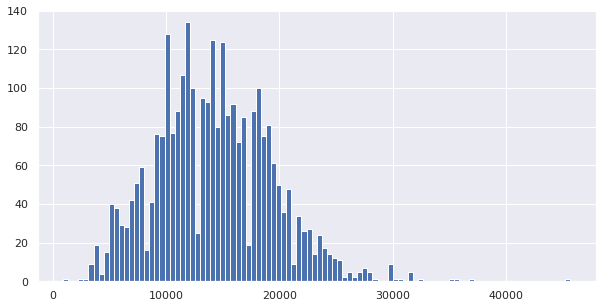

In [28]:
plt.figure(figsize=(10,5))
df['salary_mean'].hist(bins=100);

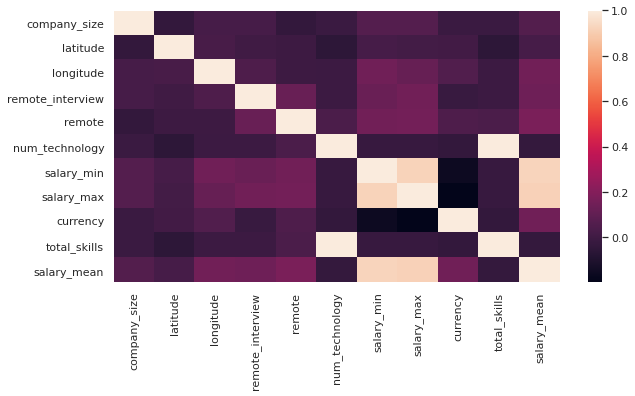

In [29]:
plt.figure(figsize=(10,5))
df_corr = df.corr()
sns.heatmap(data=df_corr);

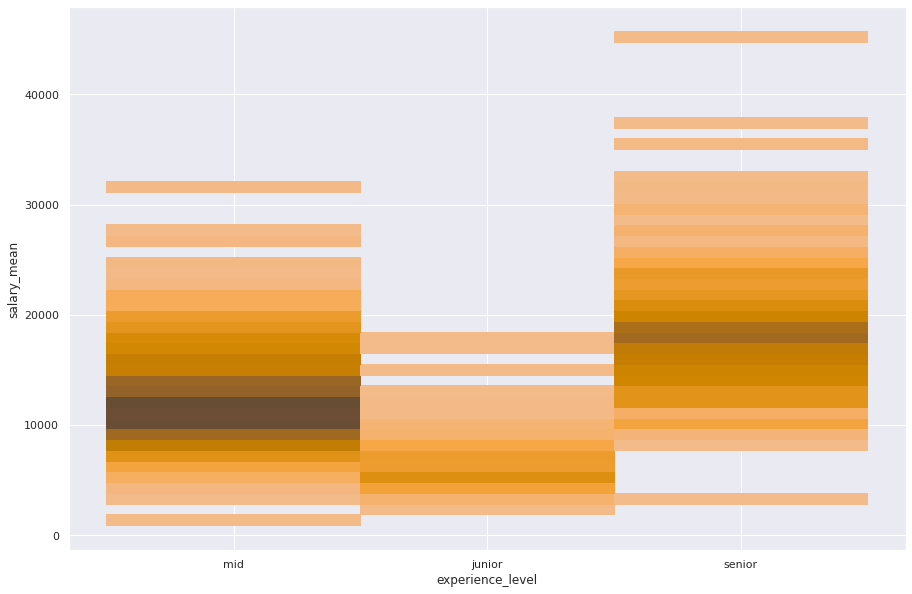

In [30]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x='experience_level', y='salary_mean', color="orange");

# Create numerical data

In [31]:
df.head()

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,...,num_technology,contract_type,salary_min,salary_max,currency,technology,levels,total_skills,company_size_bin,salary_mean
0,Devops Engineer,Lublin,PL,devops,remote,ARcreate,10,mid,51.242630,22.556270,...,3,permanent,6000.0,10000.0,1.0,"['Java', 'Scala', 'Python']","[3, 3, 3]",3,very_small,8000.0
1,Junior Frontend Engineer,Lublin,PL,javascript,remote,ARcreate,10,junior,51.242630,22.556270,...,3,permanent,3000.0,5000.0,1.0,"['CSS', 'HTML', 'JavaScript']","[2, 2, 2]",3,very_small,4000.0
2,Senior Backend Engineer,Lublin,PL,python,remote,ARcreate,10,senior,51.242630,22.556270,...,3,permanent,8000.0,12000.0,1.0,"['Django', 'REST', 'Python']","[4, 4, 4]",3,very_small,10000.0
3,Fullstack Dev. - Swedish dating startup,Warszawa,PL,javascript,remote,Relate,2,mid,52.228181,21.012568,...,3,b2b,9000.0,15000.0,1.0,"['Node.js', 'JavaScript', 'React Native']","[4, 4, 4]",3,very_small,12000.0
4,Senior Storage Engineer,Kraków,PL,other,partly_remote,ECS Resource Group,10000,mid,50.066114,19.940604,...,3,b2b,18000.0,21000.0,1.0,"['EMC', 'NAS', 'SAN']","[4, 4, 4]",3,large,19500.0


In [32]:
# Remove columns

columns_to_drop = ['company_name', 
           'company_size',
           'salary_min',
           'salary_max',
           'currency',
           'published_at',
           'longitude',
           'latitude', 
           'remote_interview', 
           'remote',
           'technology',
           'levels', 
           'title',
           'country_code',
           'num_technology', 'total_skills']

df = df.drop(columns_to_drop, axis=1)

In [33]:
df.head()

,city,marker_icon,workplace_type,experience_level,contract_type,company_size_bin,salary_mean
0,Lublin,devops,remote,mid,permanent,very_small,8000.0
1,Lublin,javascript,remote,junior,permanent,very_small,4000.0
2,Lublin,python,remote,senior,permanent,very_small,10000.0
3,Warszawa,javascript,remote,mid,b2b,very_small,12000.0
4,Kraków,other,partly_remote,mid,b2b,large,19500.0


In [34]:
df.to_csv("../data/clear_output_data.csv", index=False)

In [35]:
df = pd.read_csv('../data/clear_output_data.csv')

In [36]:
df['city'] = df['city'].astype('category')
df['city'] = df['city'].cat.codes

df['marker_icon'] = df['marker_icon'].astype('category')
df['marker_icon'] = df['marker_icon'].cat.codes

df = pd.get_dummies(df, columns=['workplace_type', 'experience_level', 'contract_type', 'company_size_bin'], prefix="feature")

In [37]:
df.head()

,city,marker_icon,salary_mean,feature_office,feature_partly_remote,feature_remote,feature_junior,feature_mid,feature_senior,feature_b2b,feature_mandate_contract,feature_permanent,feature_large,feature_medium,feature_small,feature_very_small
0,14,3,8000.0,0,0,1,0,1,0,0,0,1,0,0,0,1
1,14,8,4000.0,0,0,1,1,0,0,0,0,1,0,0,0,1
2,14,14,10000.0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,34,8,12000.0,0,0,1,0,1,0,1,0,0,0,0,0,1
4,12,11,19500.0,0,1,0,0,1,0,1,0,0,1,0,0,0


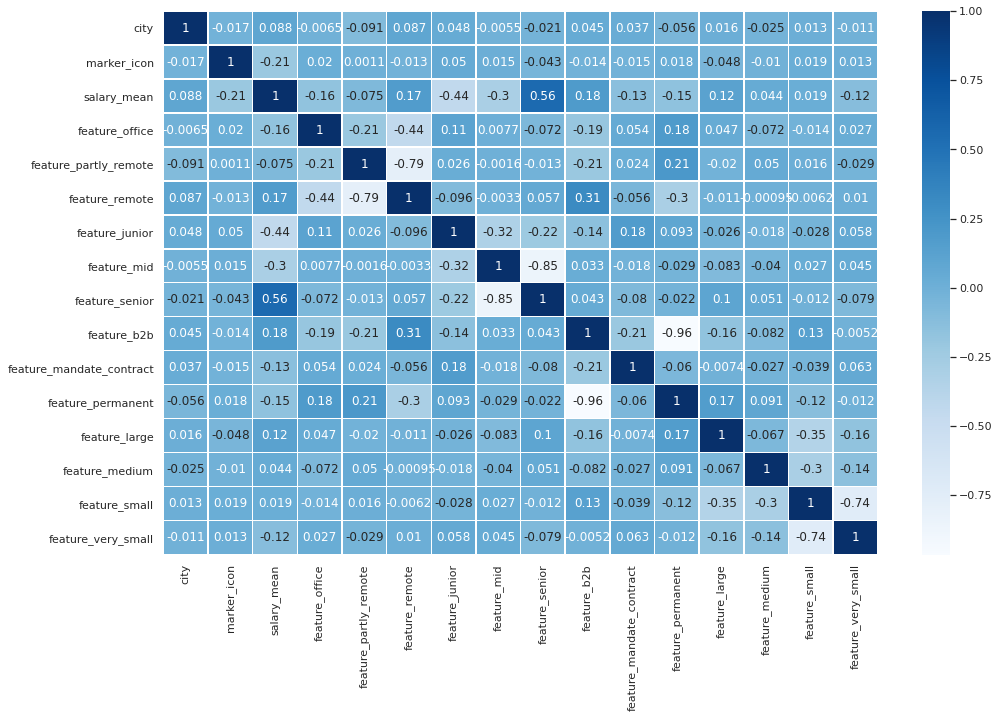

In [38]:
plt.figure(figsize=(16,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, linewidths=0.5, cmap="Blues");

In [39]:
df.to_csv("../data/numerical_df", index=False)